# Assignment 4
Data Visualization and Pre-processing


#  Load the dataset.


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

# ----------------------- Helper functions -------------------

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [181]:
df = pd.read_csv('C:/Users/Asus/Downloads/abalone.csv')
df
df['age'] = df.Rings + 1.5

 # remove rings variable
df.drop('Rings', axis=1, inplace=True)

print("Data loaded Successfully!")

Data loaded Successfully!


#Univariate Analysis
1. Summary Statistics 

In [182]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# Create charts

<AxesSubplot:>

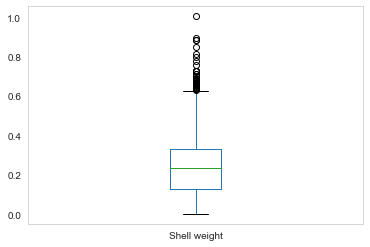

In [140]:
df.boxplot(column=['Shell weight'], grid=False)

array([[<AxesSubplot:title={'center':'Shell weight'}>]], dtype=object)

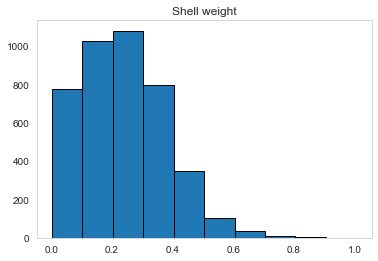

In [141]:
df.hist(column='Shell weight', grid=False, edgecolor='black')


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

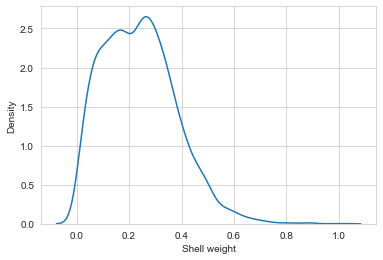

In [142]:
sns.kdeplot(df['Shell weight'])


# Bi - Variate Analysis

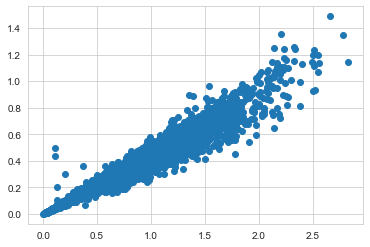

In [143]:
plt.scatter(df['Whole weight'],df['Shucked weight'])

In [144]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


TypeError: 'str' object is not callable

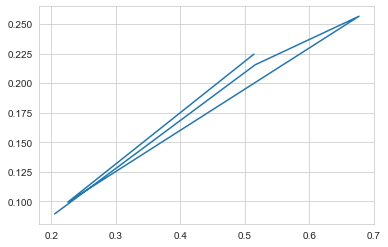

In [145]:
plt.plot(df['Whole weight'].head() ,df['Shucked weight'].head(),  )

plt.title('Line plot')
plt.xlabel('Whole weight')
plt.ylabel('Shucked weight')

# Multivariate analysis

<AxesSubplot:>

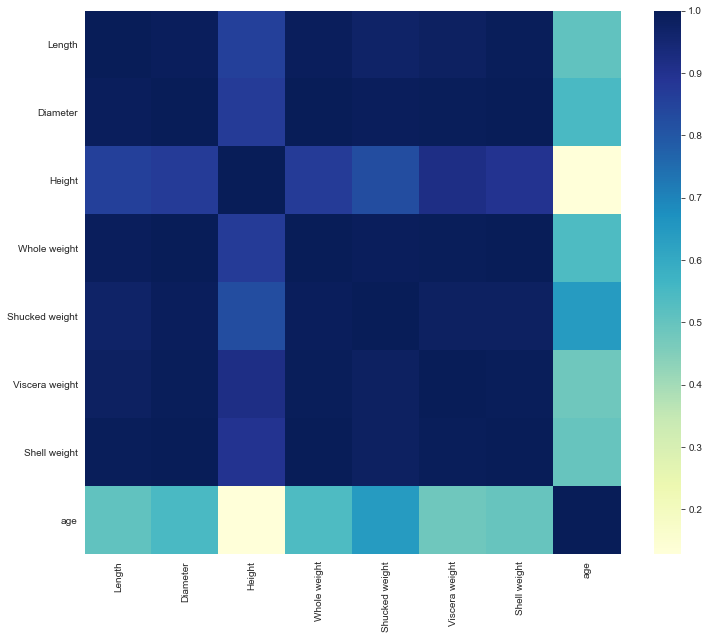

In [146]:
f = plt.subplots(figsize=(12,10))
sns.heatmap(df.head().corr(), cmap="YlGnBu")

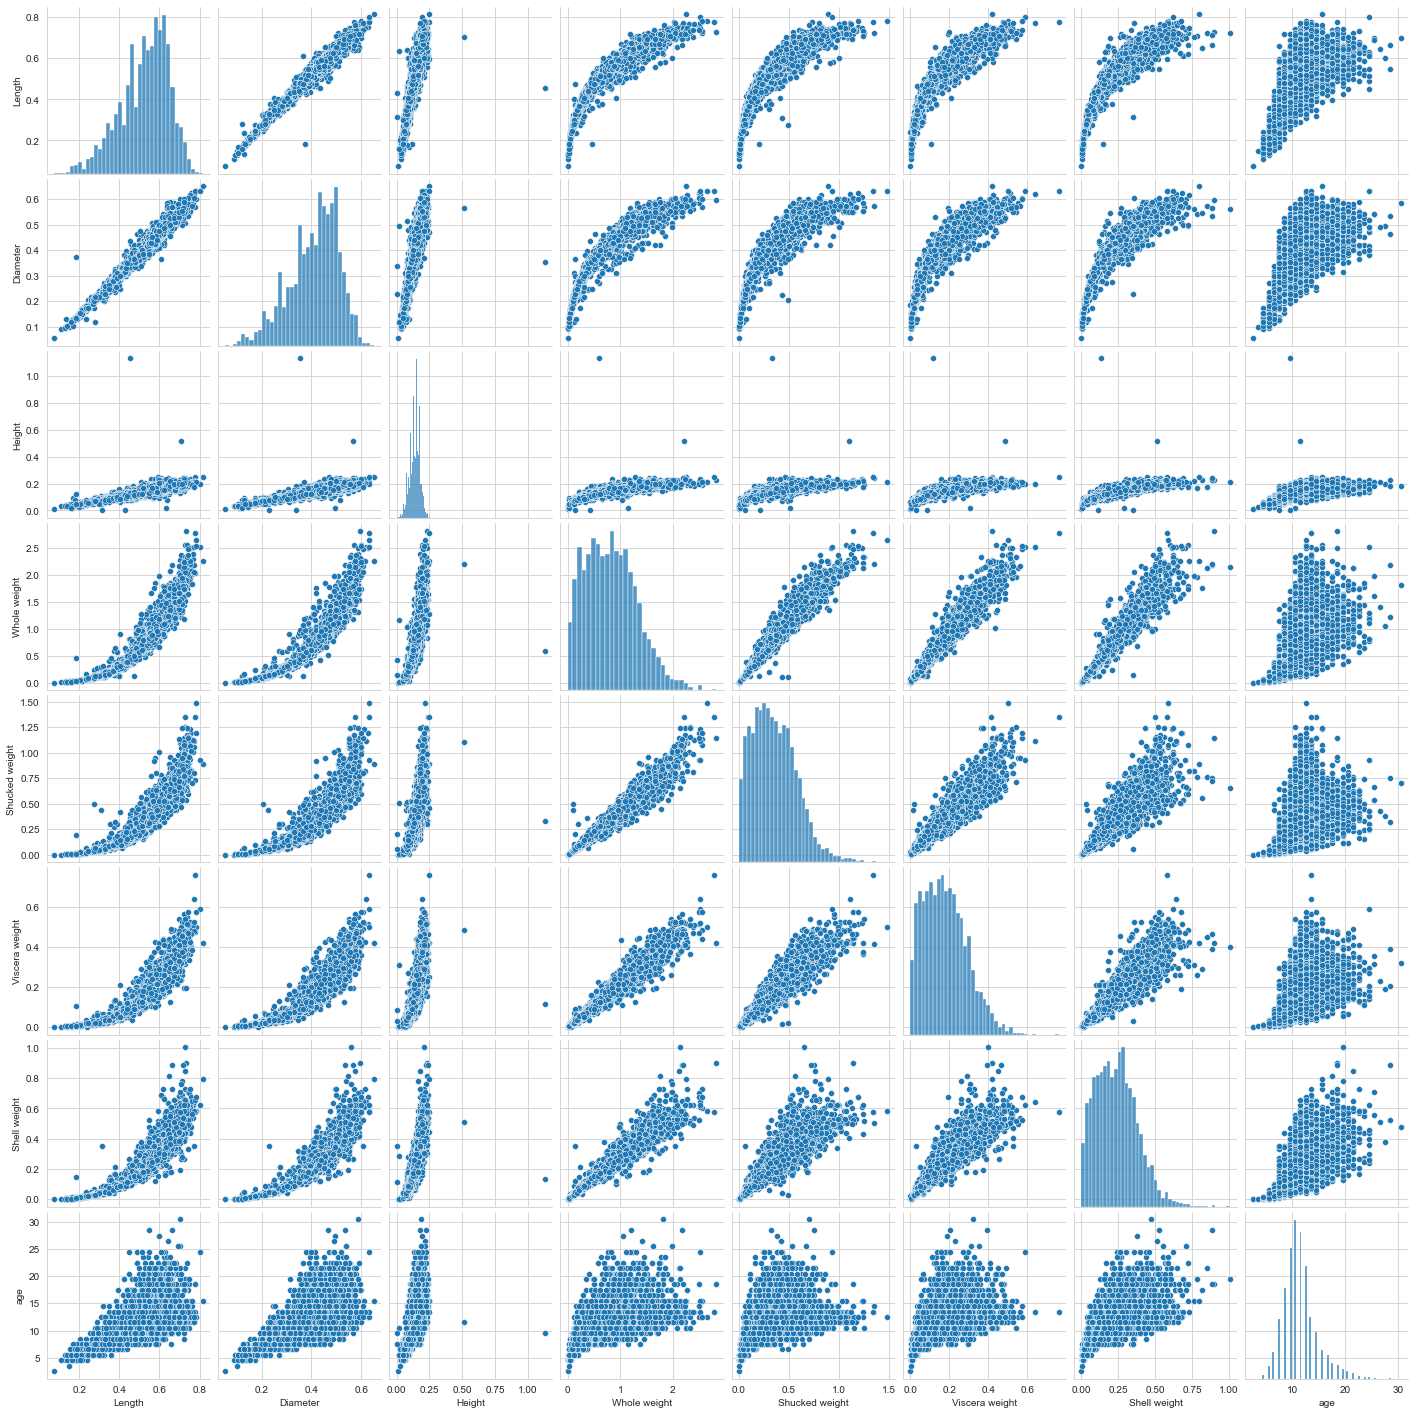

In [147]:
sns.pairplot(df)

<AxesSubplot:>

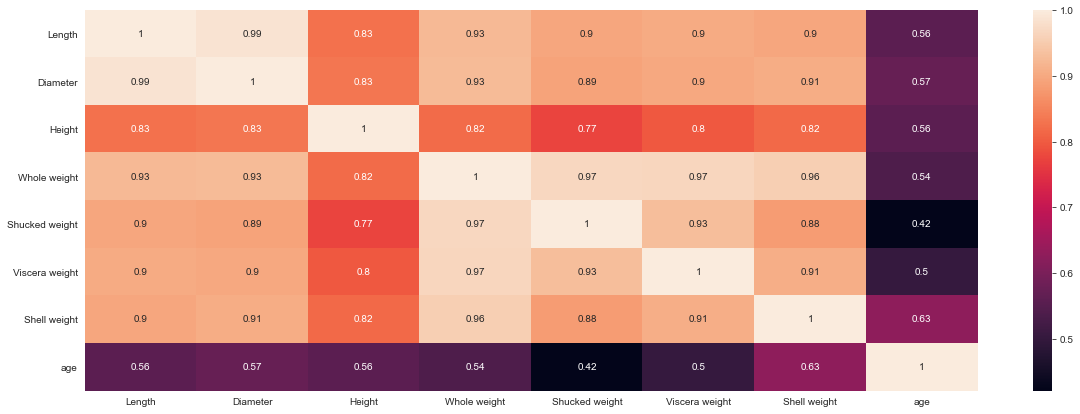

In [148]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

# Perform descriptive statistics on the dataset.
 

In [149]:
df.shape

(4177, 9)

In [150]:
df.columns 

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [151]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [152]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [153]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [154]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [155]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [156]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Handle the Missing values.


In [157]:
print(df.isnull())

        Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     False   False     False   False         False           False   
1     False   False     False   False         False           False   
2     False   False     False   False         False           False   
3     False   False     False   False         False           False   
4     False   False     False   False         False           False   
...     ...     ...       ...     ...           ...             ...   
4172  False   False     False   False         False           False   
4173  False   False     False   False         False           False   
4174  False   False     False   False         False           False   
4175  False   False     False   False         False           False   
4176  False   False     False   False         False           False   

      Viscera weight  Shell weight    age  
0              False         False  False  
1              False         False  False  
2              

In [158]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

#  Find the outliers and replace the outliers


In [159]:
train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


# Variable separation

In [167]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

# Target distribution

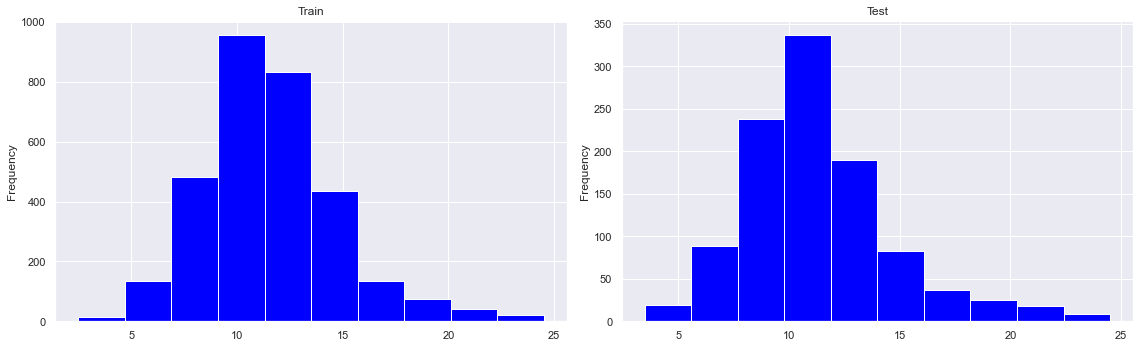

In [202]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

# Distribution of numerical features

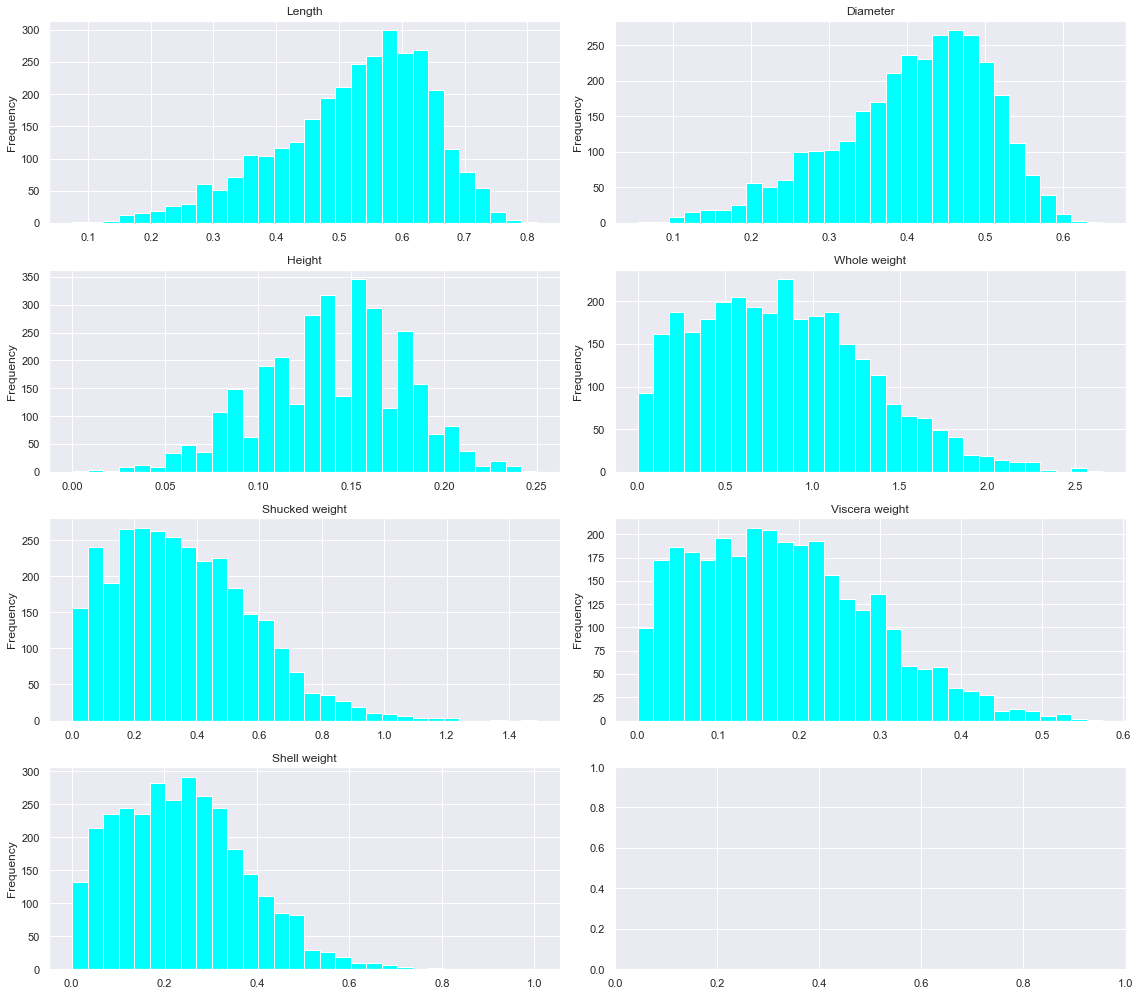

In [203]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='cyan', bins=30)
    
plt.tight_layout()
plt.show()

# Boxplot(Outliers)

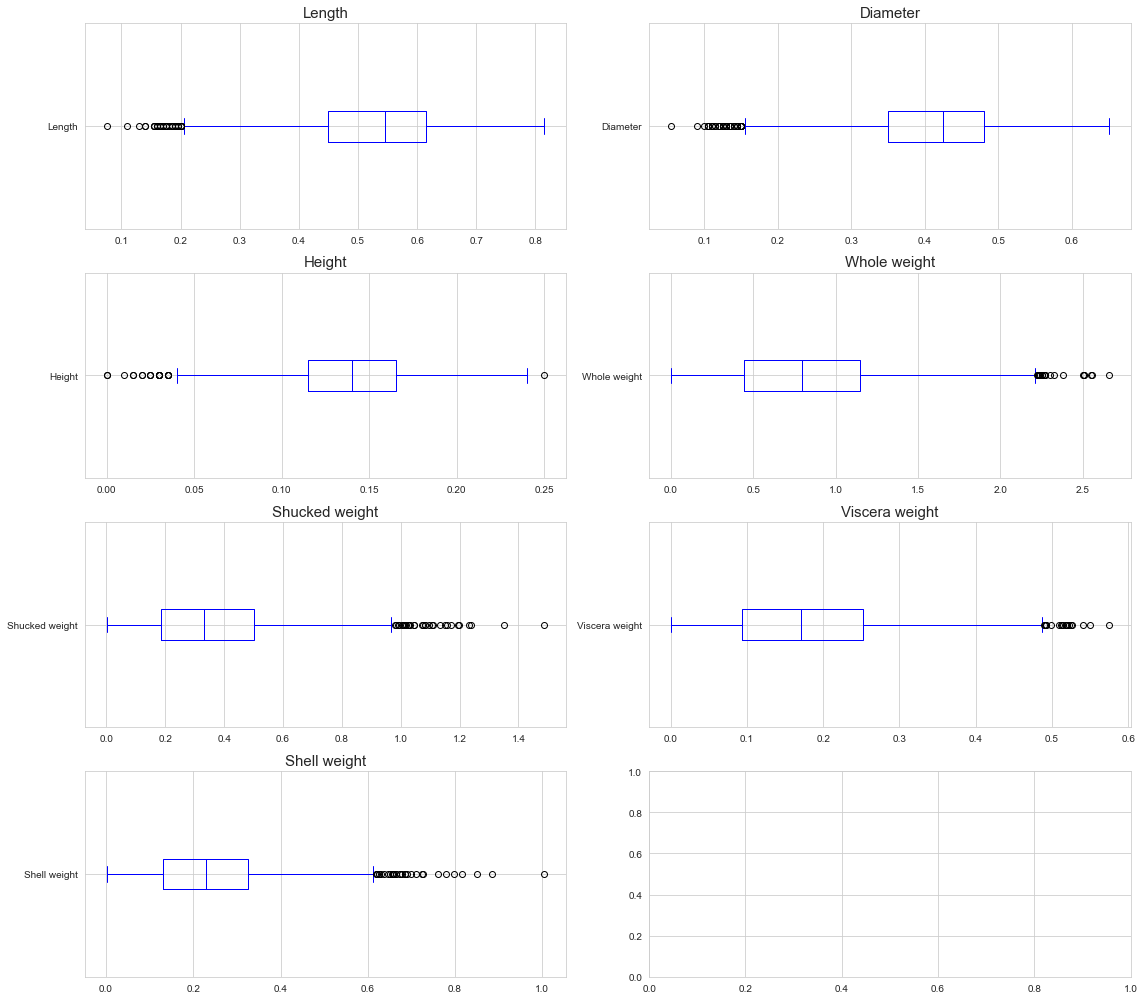

In [170]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

# Pie chart : Categorical feature sex

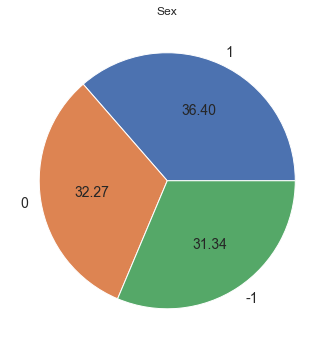

In [204]:
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()


# Pearson Correlation

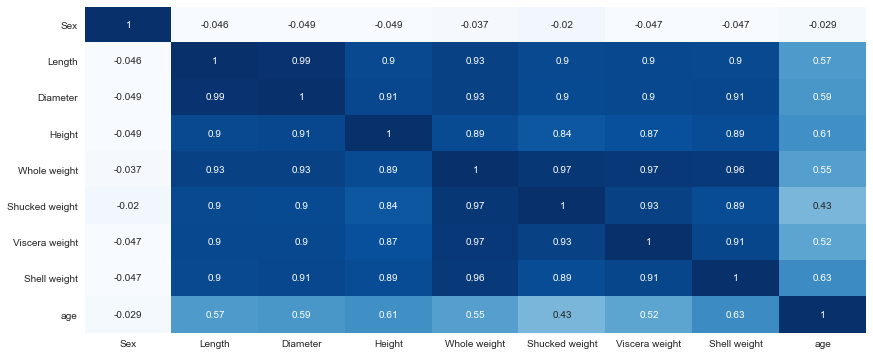

In [172]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

# Height Vs Length Vs age

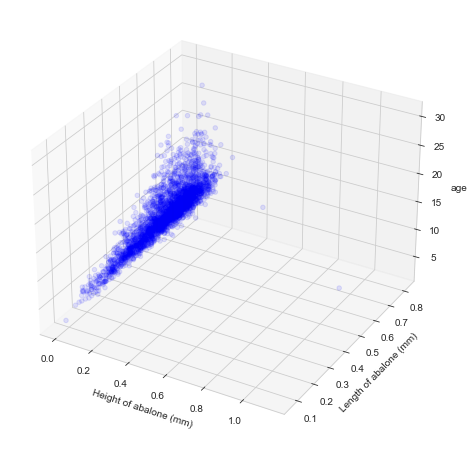

In [164]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'],
             train['Length'], 
             train[target],
             c='blue',
             alpha=0.1);

plt.show()

# Scatter plot


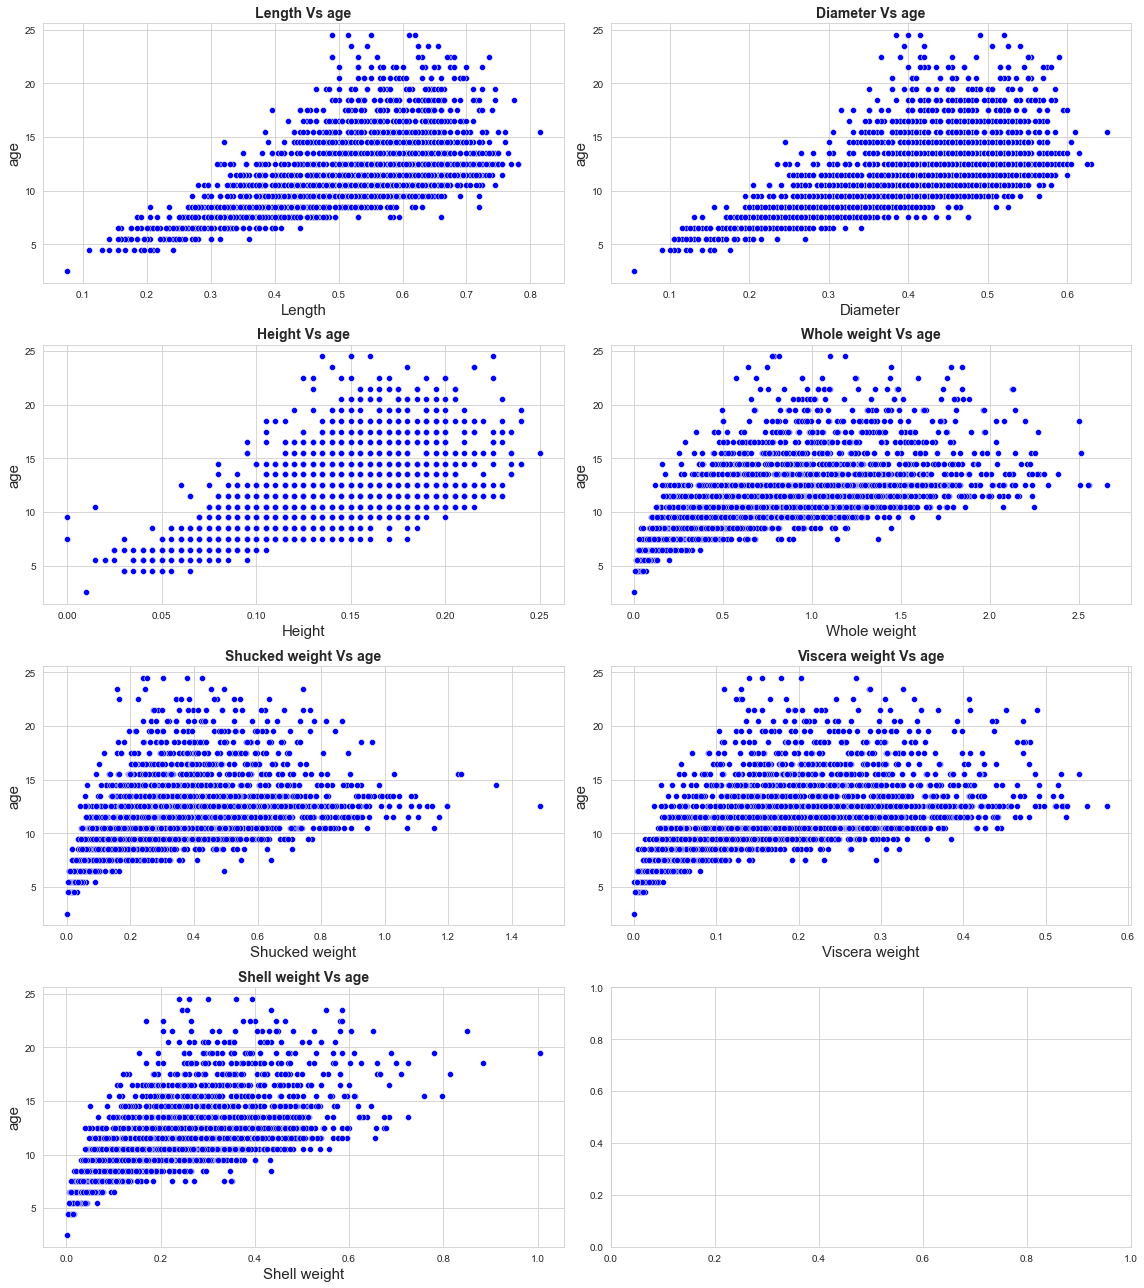

In [173]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c],
                        y=train[target],
                        ax=axes[i],
                        color='blue')
    
    axes[i].set_title(f"{c} Vs age",
                      fontsize=14, 
                      fontweight='bold')
    
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()

# Label Encoding

In [183]:
train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

# Removing outliers

In [205]:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

# Split the data into dependent and independent variables


In [214]:
# Splitting the Dataset into the Independent

X = df.iloc[:, :-1].values
print(X)

[['Length']
 ['Diameter']
 ['Height']
 ['Whole weight']
 ['Shucked weight']
 ['Viscera weight']
 ['Shell weight']
 ['Sex']]


In [215]:
# Extracting the Dataset to Get the Dependent

Y = df.iloc[:, -1].values
print(Y)

[0.08050966929596948 0.10924659159919295 0.13527752763066053
 0.15710514425282232 0.1203996256444543 0.1247626207310252
 0.2479560616535119 0.024742759192363375]


# Scale the independent variables


In [216]:
from sklearn.preprocessing import scale

In [218]:
x = scale(Y)
x

array([-0.74468165, -0.26368143,  0.17202583,  0.5373777 , -0.07700132,
       -0.00397327,  2.05804545, -1.67811132])

# Split the data into training and testing


In [177]:
train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


# Build the model

# Feature seperation

In [188]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
4014,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.285,1
3252,0.480,0.380,0.130,0.6175,0.3000,0.1420,0.175,1
305,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.011,0
1857,0.505,0.400,0.145,0.7045,0.3340,0.1425,0.207,0
439,0.500,0.415,0.165,0.6885,0.2490,0.1380,0.250,1


# Base models

In [189]:
models = {'linear_regression':LinearRegression(),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
         
        }

In [190]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n------------------------------------------")

linear_regression
Train rmse :  2.1601637766834694
Test rmse :  2.199332649510367

------------------------------------------
decision_tree
Train rmse :  0.0
Test rmse :  2.8672378052018894

------------------------------------------
random_forest
Train rmse :  0.7983734867135102
Test rmse :  2.1456051220373515

------------------------------------------


# Running the model

In [192]:
# Linear regression
lr_params = {'fit_intercept':[True,False]}



# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}



In [193]:
params = [lr_params,  dt_params, rf_params, ]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

linear_regression
Best params : {'fit_intercept': True}
RMSE : 2.1685158384088488

decision_tree
Best params : {'min_samples_split': 30, 'max_leaf_nodes': 16, 'max_features': 0.8, 'max_depth': 14}
RMSE : 2.320260154702674

random_forest
Best params : {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
RMSE : 2.1309509089096124



# Final modeling
Random forest regressor is performing better
Train the model

In [194]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

# Saving the model

In [195]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Evaluation

In [196]:
print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))


Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156


# Feature importance

In [197]:
df = pd.DataFrame([features, model.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

,feature,importance
6,Shell weight,0.247956
3,Whole weight,0.157105
2,Height,0.135278
5,Viscera weight,0.124763
4,Shucked weight,0.1204
1,Diameter,0.109247
0,Length,0.0805097
7,Sex,0.0247428


# Scatter plot

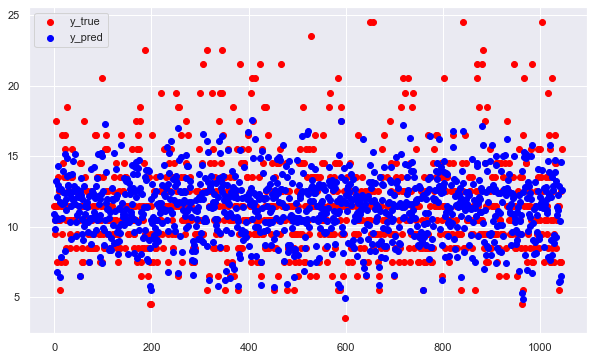

In [198]:
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

# Error distribution

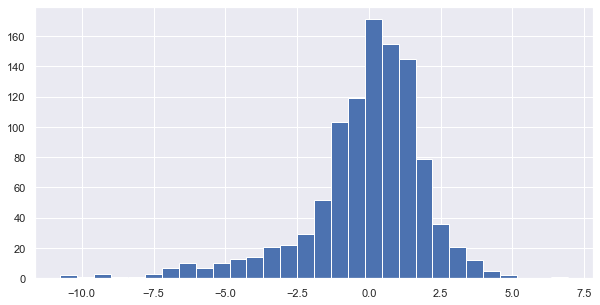

In [219]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()

# Test the model

In [200]:
def predict_age(x):
    x = pd.DataFrame([x], columns=features)
    age = model.predict(x)
    return round(age[0],2)

In [201]:
with open("model.pkl", 'rb') as f:
    model = pickle.load(f)
    
# Random sample from test set
ex = [0.295 , 0.225 , 0.08  , 0.124 , 0.0485, 0.032 , 0.04  , 0.]

print("Estimated age : ",predict_age(ex))

Estimated age :  8.86


# Measure the performance using Metrics.

In [231]:

y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5098937086684512
Mean Squared Error: 4.61800632962725
Root Mean Squared Error: 2.1489547062763443
